In [85]:
import numpy as np
from numpy import loadtxt
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Activation
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [86]:
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    for i in x:
        hasil_normalisasi = (0.8 * ((x - b) / (a - b))) + 0.1
    return hasil_normalisasi

In [87]:

# load the data latih
# Data Tingkat Pengangguran Terbuka (TPT) mulai Tahun 1997 
# sampai dengan Tahun 2020

TPT = loadtxt('data_pengangguran.csv', delimiter=',')
TPT_normal = normalisasi(TPT)

TPT_Target = TPT[:,10]
TPT_Target_uji = TPT[:,11]

#Data Latih
#Data dibagi menjadi 10 variabel input dan 1(x) variabel output
#Input : mulai tahun 1997 sampai dengan 2016

x = TPT_normal[0:,0:10]
#Output : dat TPT tahun 2017 dan 2018
y = TPT_normal[0:,10]

x1 = TPT_normal[:,1:11]

#urut tahun, menggantikan indeks dari 0 s.d 1
urut = [1,
        2
        ]



In [88]:
print(TPT)

[[ 8.1   9.67 10.75  9.43  8.01  7.22  6.03  5.99  5.42  5.11  6.38  5.39]
 [ 9.06  9.86 10.36  8.43  7.28  6.25  5.82  5.56  5.2   6.01  5.85  4.82]]


In [89]:
TPT_normal = normalisasi(TPT)
print(TPT_normal)

[[0.54249578 0.75430017 0.9        0.72192243 0.53035413 0.4237774
  0.26323777 0.25784148 0.18094435 0.1391231  0.31045531 0.17689713]
 [0.67200675 0.77993255 0.84738617 0.58701518 0.43187184 0.29291737
  0.23490725 0.19983137 0.15126476 0.26053963 0.23895447 0.1       ]]


In [90]:
baris, kolom = TPT.shape
print("barisnya = ", baris)
print("kolomnya = ", kolom)

barisnya =  2
kolomnya =  12


In [91]:
baris, kolom = TPT_normal.shape
print("barisnya = ", baris)
print("kolomnya = ", kolom)

barisnya =  2
kolomnya =  12


In [92]:
baris, kolom = x.shape
print("barisnya = ", baris)
print("kolomnya = ", kolom)

barisnya =  2
kolomnya =  10


In [93]:
#Mendefinisikan model keras
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\alhud\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [95]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []
    
    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

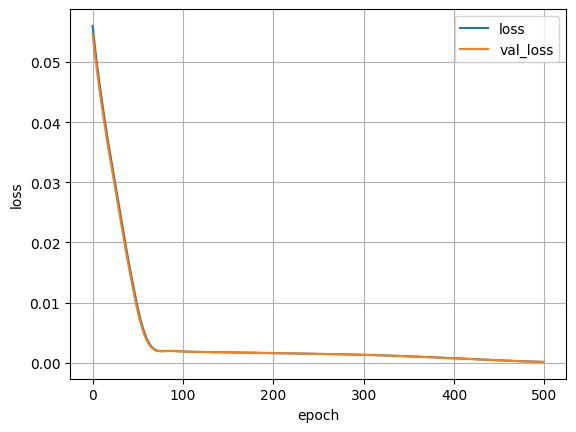

In [96]:
model.fit(x, y,
          epochs=500,
          validation_data=(x, y),
          callbacks=[plot_losses],
          verbose=0)

In [97]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(x, y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.2f' % (MSE))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2477e-04 - mean_squared_error: 1.2477e-04 
MSE : 0.00


In [98]:
#Menjalan model untuk prediksi data uji
y_pred = model.predict(x)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.29987228]
 [0.25121453]]


In [99]:
#Denormalisasi data sebelum dibandingkan dengan data aktual
a = np.max(TPT)
b = np.min(TPT)

#rumus denormalisasi
#x_denormalisasi = (((x_normalisasi - 0.1)* (a - b))/0.8) + b
y_prediksi = (((y_pred - 0.1) * (a - b))/0.8) + b
print("y_prediksi = ", y_prediksi)

y_prediksi =  [[6.3015537]
 [5.940878 ]]


In [100]:
#urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['2021',
            '2022'
            ]

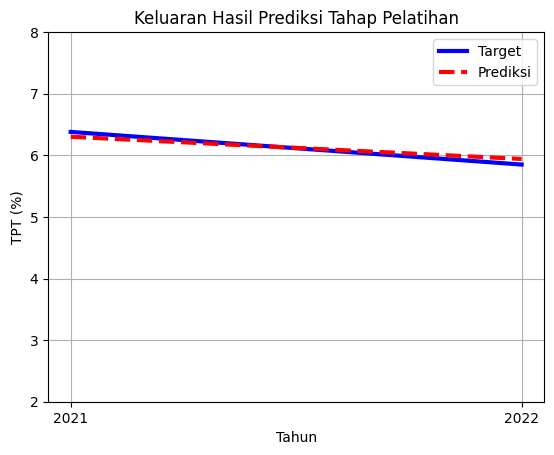

In [101]:
#Plot hasil prediksi tahap pelatihan
plt.title('Keluaran Hasil Prediksi Tahap Pelatihan')
plt.plot(urutan1, TPT_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((2,8))
plt.grid()

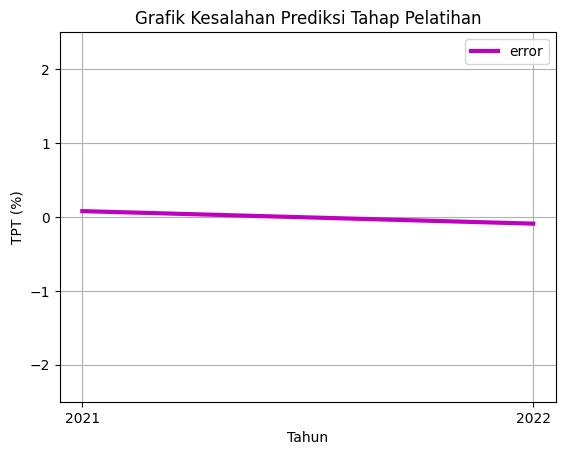

In [102]:
#plot kesalahan prediksi
selisih = TPT_Target - y_prediksi.transpose()
plt.title('Grafik Kesalahan Prediksi Tahap Pelatihan')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((-2.5,2.5))
plt.grid()

In [103]:
#Pengukuran kinerja model Deep Learning dengan MAPE
#MAPE = Mean Absolute Percentage Error
from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(TPT_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(TPT_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 0.00720630660229947
rmse = 0.0848899676186737
MAPE = 4.346173116798792
Persentase_keberhasilan = 95.6538268832012


##Prediksi TPT
#Tahap Pengujian
input mulai 2001 sampai tahun 2022
untuk memprediksi TPT di tahun 2023 dan 2024

In [104]:
#Urutan tahun, menggantikan indeks dari 0 s.d 1
urutan2 = ['2023',
            '2024'
            ]

In [105]:
#Uji model untuk prediksi data uji
y_uji = model.predict(x1)
print('Hasil Prediksi sebelum denormalisasi = ', y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Hasil Prediksi sebelum denormalisasi =  [[0.29987228]
 [0.25121453]]


In [106]:
#Denormalisasi data sebelum dibandingkan dengan data aktual
a = np.max(TPT)
b = np.min(TPT)

#rumus denormalisasi
#x_denormalisasi = (((x_normalisasi - 0.1)* (a - b))/0.8) + b
y_pengujian = (((y_uji - 0.1) * (a - b))/0.8) + b
print("y_pengujian = ", y_pengujian)

y_pengujian =  [[5.75999  ]
 [5.9104958]]


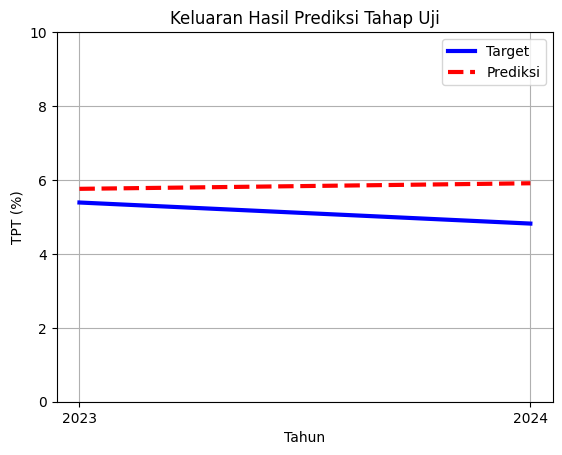

In [107]:
#Plot hasil prediksi tahap uji
plt.title('Keluaran Hasil Prediksi Tahap Uji')
plt.plot(urutan2, TPT_Target_uji, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((0,10))
plt.grid()

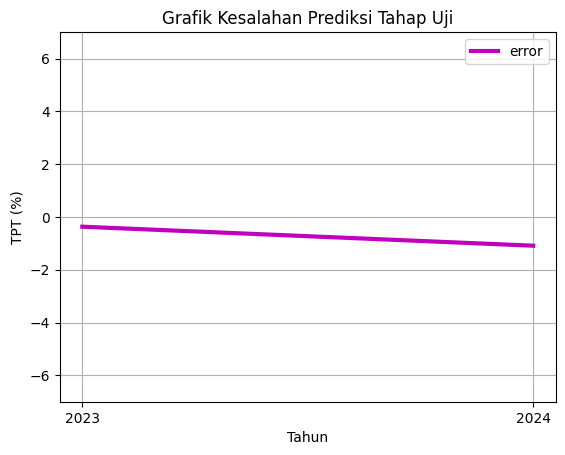

In [108]:
#plot kesalahan prediksi tahap uji
selisih_pengujian = TPT_Target_uji - y_pengujian.transpose()
plt.title('Grafik Kesalahan Prediksi Tahap Uji')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((-7,7))
plt.grid()

In [109]:
#Pengukuran kinerja model Deep Learning dengan MAPE taha uji
mse1  = mean_squared_error(TPT_Target_uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(TPT_Target_uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)


mse = 0.6630368788791937
rmse = 0.8142707650893489
MAPE = 14.661835144984522
Persentase_keberhasilan = 85.33816485501548
